In [1]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
IMG_DIR = "../coco_dataset_val_2017_all/imgs_test/"
CAPS_DIR = "../coco_dataset_val_2017_all/caps_test/"

CLASSES = {
 0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mouse',
 65: 'remote',
 66: 'keyboard',
 67: 'cell phone',
 68: 'microwave',
 69: 'oven',
 70: 'toaster',
 71: 'sink',
 72: 'refrigerator',
 73: 'book',
 74: 'clock',
 75: 'vase',
 76: 'scissors',
 77: 'teddy bear',
 78: 'hair drier',
 79: 'toothbrush',
 80: 'toothbrush'
 }

def get_class_name(class_id):
    return CLASSES[class_id]

def get_caption(img_id, caps_dir):
    with open(f"{caps_dir}{img_id}.txt", "r") as f:
        return f.read()

In [5]:
model = YOLO("yolov8n.pt")

In [6]:
results = model.predict(source=IMG_DIR, save_txt=True, save=True, conf=0.5)


image 1/2 C:\Users\ariha\Desktop\Image-Captioning-Cleaned\coco_dataset_val_2017_all\imgs_test\139.jpg: 448x640 1 person, 2 chairs, 1 tv, 943.4ms
image 2/2 C:\Users\ariha\Desktop\Image-Captioning-Cleaned\coco_dataset_val_2017_all\imgs_test\285.jpg: 640x608 1 bear, 1414.9ms
Speed: 29.4ms preprocess, 1179.2ms inference, 44.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to c:\Users\ariha\Desktop\Image-Captioning-Cleaned\runs\detect\predict4
2 labels saved to c:\Users\ariha\Desktop\Image-Captioning-Cleaned\runs\detect\predict4\labels


In [7]:
for result, cap in zip(results, os.listdir(CAPS_DIR)):
    box = result.boxes
    img_id = cap.split(".")[0]

    xyxyn = None
    class_name = None
    confidence = None

    with open(CAPS_DIR + cap, "r") as f:
        caption = f.read()

    all_captions = caption.split("\n")[:-1]
    
    res = []
    for ele in all_captions:
        if ele.strip():
            res.append(ele)

    all_captions = res.copy()

    if len(all_captions) != 5:
        all_captions = all_captions[:5]
        print(f"Image ID: {img_id} NOW has {len(all_captions)} captions")
        print(all_captions)

    
    for i in range(len(box)):
        xyxyn = box.xyxyn.tolist()[i]
        xyxyn = [round(x, 2) for x in xyxyn]
        class_name = get_class_name(box.cls.tolist()[i])
        confidence = box.conf.tolist()[i]

        with open("../data/x_new.txt", "a") as f:
            f.write(f"{class_name}: {xyxyn}, ")

    with open("../data/x_new.txt", "a") as f:
        f.write(f"\n")

    with open("../data/y_new.txt", "a") as f:
        f.write(f"{all_captions} \n")

In [72]:
def draw_bbox(img, coord_list, color=(0, 255, 0), thickness=2):
    for i in range(len(coord_list)):
        x1, y1, x2, y2 = coord_list[i]
        cv2.rectangle(img, (x1, y1), (x2, y2),
                      color=color, thickness=thickness)


def show_img(img, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()


def show_img_bbox(img, coord_list, figsize=(5, 5)):
    draw_bbox(img, coord_list)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    show_img(img, figsize=figsize)

# Crop the object and find its median color


def crop_object(img, coord_list):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    crop_img = []
    for i in range(len(coord_list)):
        x1, y1, x2, y2 = coord_list[i]
        crop_img.append(img[y1:y2, x1:x2])
    return crop_img


def find_median_color(img):
    median_color = []
    for i in range(len(img)):
        median_color.append(np.median(img[i], axis=(0, 1)))
    return median_color


def get_color_name(rgb):
    colors = {
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255),
        "yellow": (255, 255, 0),
        "magenta": (255, 0, 255),
        "cyan": (0, 255, 255),
        "black": (0, 0, 0),
        "white": (255, 255, 255),
        "orange": (255, 165, 0),
        "purple": (128, 0, 128),
        "pink": (255, 192, 203),
        "brown": (165, 42, 42),
        "gold": (255, 215, 0),
        "silver": (192, 192, 192),
        "gray": (128, 128, 128),
        "lavender": (230, 230, 250),
        "olive": (128, 128, 0),
        "teal": (0, 128, 128),
        "navy": (0, 0, 128),
        "maroon": (128, 0, 0)
    }

    min_distance = float("inf")
    closest_color = None
    for color, value in colors.items():
        distance = sum([(i - j) ** 2 for i, j in zip(rgb, value)])
        if distance < min_distance:
            min_distance = distance
            closest_color = color
    return closest_color


def color_from_median(img, coord_list):
    crop_img = crop_object(img, coord_list)
    median_color = find_median_color(crop_img)
    median_color = [tuple([int(x) for x in color]) for color in median_color]
    closest_colors = []

    for color in median_color:
        color_img = np.zeros((1, 1, 3), np.uint8)
        color_img[:] = color
        show_img(color_img, figsize=(1, 1))
        closest_color = get_color_name(color)
        print(f"Closest color: {closest_color}")
        closest_colors.append(closest_color)

    return closest_colors


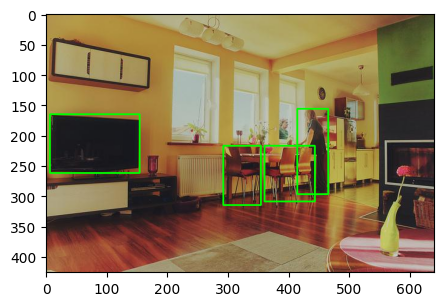

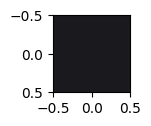

Closest color: black


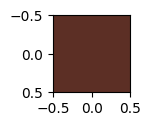

Closest color: maroon


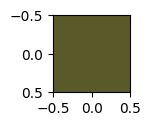

Closest color: olive


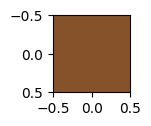

Closest color: brown


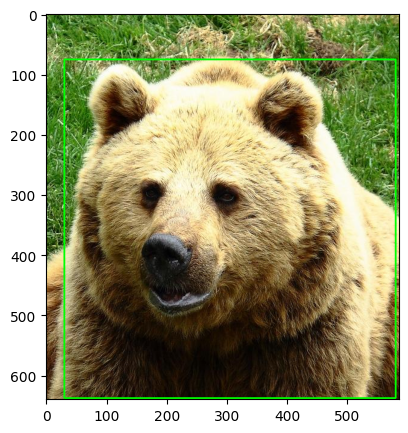

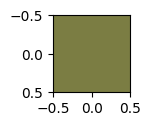

Closest color: gray


In [73]:
for result in results:
    box = result.boxes
    coord_list = []
    for i in range(len(box)):
        xyxy = box.xyxy.tolist()[i]
        xyxy = [int(x) for x in xyxy]
        coord_list.append(xyxy)
    
    show_img_bbox(result.orig_img, coord_list)
    closest_colors = color_from_median(result.orig_img, coord_list)